<a href="https://colab.research.google.com/github/JoaoPariss/MODULO-37---PROJETO-8/blob/main/Profissao_Cientista_de_Dados_M37_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [2]:
# Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import datetime

In [3]:
# Carregamento da Base
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [4]:
# Visualização do DataFrame
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [5]:
# Verificação dos Tipos de Dados e Possíveis Dados Nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
# Verificação do Percentual de Dados Nulos
(df.isnull().sum() / len(df)) * 100

,0
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000


Pequeno percentual de dados nulos apenas na variável Income (1,07%). Vamos analisar a distribuição dos dados antes de decidir se iremos excluir os valores nulos ou se iremos substituí-los.

In [7]:
# Verificação da Distribuição dos Dados
df.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


Em seguida será feita análise univariada, mas a partir da função describe já dá para suspeitar que a variável Year_Birth e Income possuam outliers.

A variável Income possui média e medianas parecidas, portanto, iremos substituir o 1,07% de dados nulos pela mediana.

In [8]:
# Substituição dos Valores Nulos de Income pela Mediana
df['Income'] = df['Income'].fillna(df['Income'].median())

### Análise Univariada

O principal objetivo da análise univariada será entender e traçar o perfil dos visitantes.

In [9]:
# Análise da Proporção de Visitantes que Compraram
df['WebPurchases'].value_counts(normalize=True) * 100

,proportion
WebPurchases,
1,50.357143
0,49.642857


A proporção dos visitantes que compraram no site (50,35%) é semelhante ao dos que não compraram (49,64).

<Axes: >

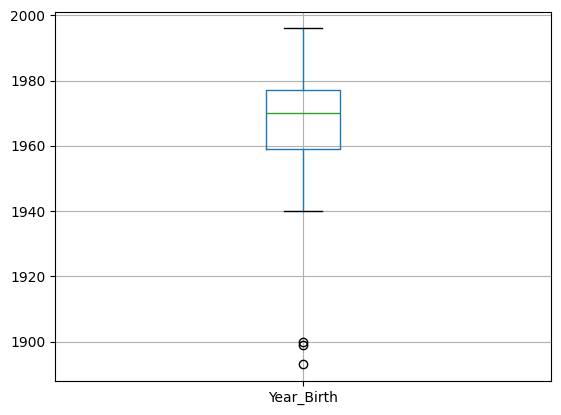

In [10]:
# Detecção de Outliers em Year_Birth
df.boxplot(column='Year_Birth')

Como suspeitado, a variável Year_Birth possue outliers em pontos abaixo de 1920, que serão excluídos.

In [11]:
df = df[df['Year_Birth'] >= 1920]

Text(0.5, 1.0, 'Year_Birth Distribution')

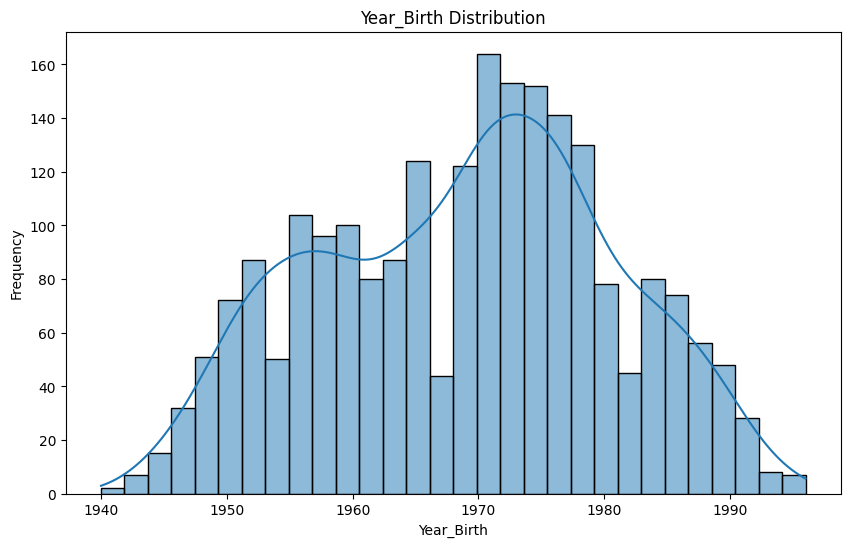

In [12]:
# Distribuição de Year_Birth
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], bins=30, kde=True)
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.title('Year_Birth Distribution')

A maior parte dos visitantes nasceu entre 1955 e 1980. Nenhum nascido após 1996, isso indica que o site atrai o público mais velho e não atrai consumidores mais jovens.

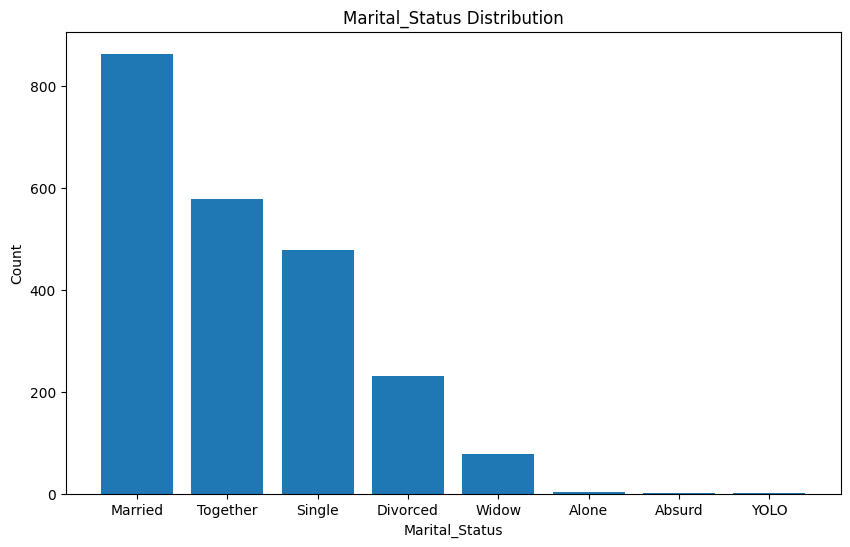

In [13]:
# Análise da Distribuição do Estado Civil
plt.figure(figsize=(10, 6))
plt.bar(df['Marital_Status'].value_counts().index, df['Marital_Status'].value_counts())
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Marital_Status Distribution')
plt.show()

A maior parte dos visitantes ou é casado ou mora junto com outra pessoa. Isso indica que o site é mais atrativo para pessoas que estão em relacionamentos sérios do que para as pessoas solteiras.

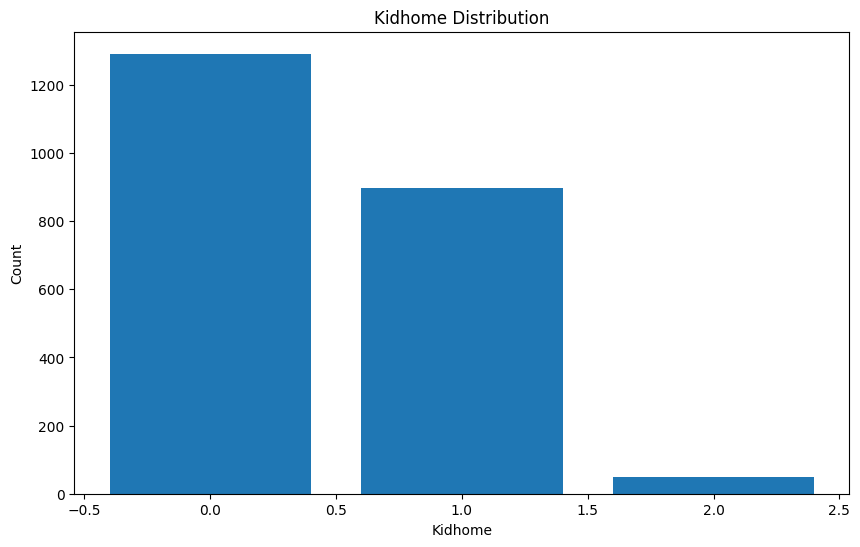

In [14]:
plt.figure(figsize=(10,6))
plt.bar(df['Kidhome'].value_counts().index, df['Kidhome'].value_counts())
plt.xlabel('Kidhome')
plt.ylabel('Count')
plt.title('Kidhome Distribution')
plt.show()

Por mais que a maior parte dos visitantes sejam casados, a distribuição no número de crianças em casa indica que os possíveis clientes ou não tem, ou tem poucos filhos, no máximo 2.

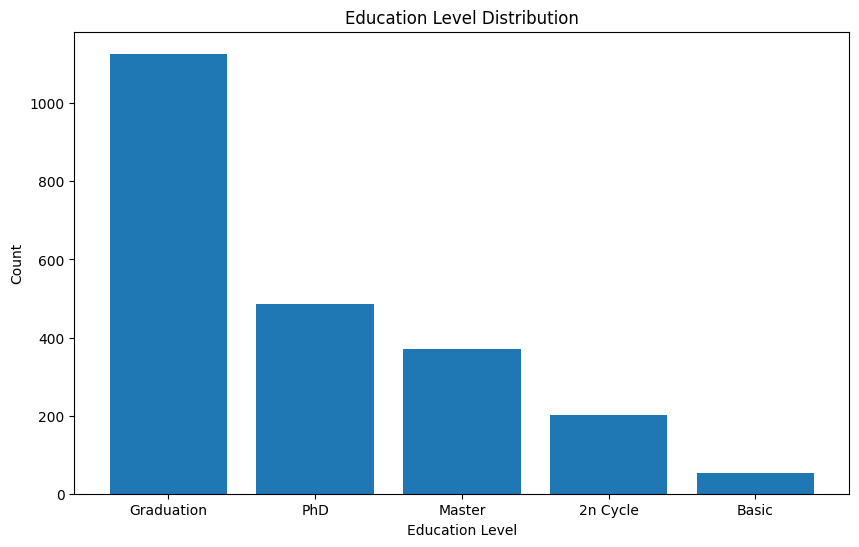

In [15]:
# Análise da Distribuição do Nível de Educação
plt.figure(figsize=(10, 6))
plt.bar(df['Education'].value_counts().index, df['Education'].value_counts())
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()


A maior parte da base de visitantes no site possuem graduação. Clientes com nível básico e 2n cycle, ensino secundário, são minoria entre os visitantes. Isto indica que o site está atraindo mais as pessoas com alto nível de educação.

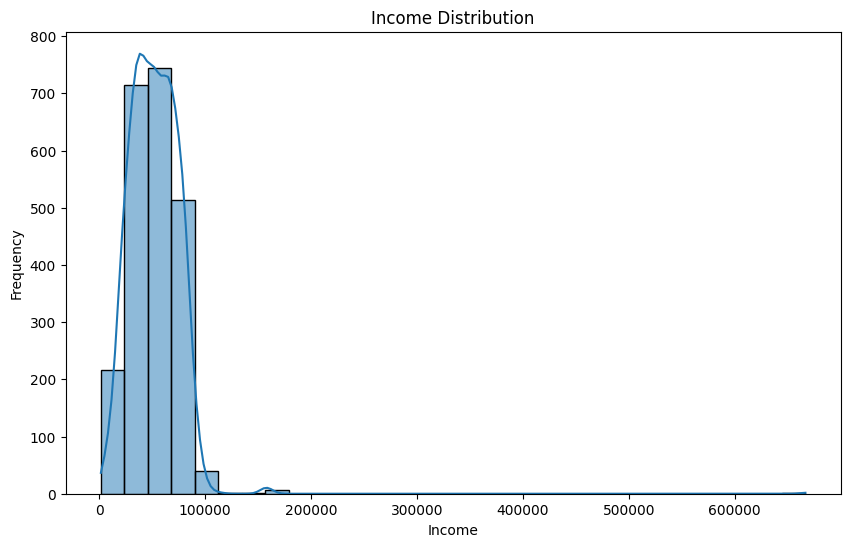

In [16]:
# Distribuição da Renda
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

Parece haver um outlier nessa variável, vamos analisar com um gráfico de boxplot

<Axes: >

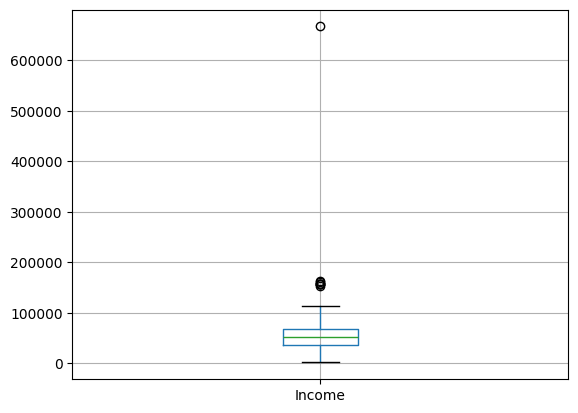

In [17]:
df.boxplot(column='Income')

De fato, o gráfico boxplot mostra dois níveis de outliers, o primeiro entre 200000 e 140000, que estão acima da mediana, 51381.50.  E outro ainda mais extremo, um ponto acima de 600000.

Este último, mais extremo, por mais que possa não ser um erro de digitação, corre o risco de enviesar o modelo. Portanto ele será excluído.

Já os pontos aproximadamente entre 150000 e 170000 serão mantidos, pois podem ser úteis para explicar comportamentos quando a renda é acima da média.

Após retirado o outliers, vamos plotar novamente o histograma.

In [18]:
# Remoção de Outlier
df = df[df['Income'] <= 200000]

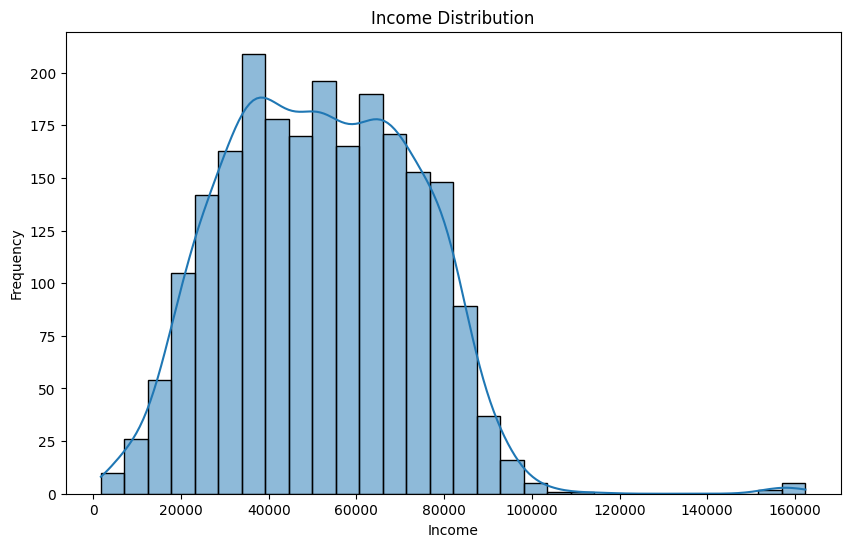

In [19]:
# Distribuição da Renda sem Outlier Extremo
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

Base bem distribuída de clientes com renda anual entre 20000 e 80000, com alguns poucos com rendas superiores a 1400000.

In [20]:
# Análise da Proporção de Visitantes que Reclamaram
df['Complain'].value_counts(normalize=True) * 100

,proportion
Complain,
0,99.105546
1,0.894454


Pouquíssimos visitantes reclamam, menos de 1%.

In [21]:
# Análise Recency Média
print('Média Recency', df['Recency'].mean())

Média Recency 49.116279069767444


A média de Recency é 49, indicando que, em média, os clientes interagiram com o site pela última vez há cerca de 49 dias.

In [22]:
# Análise Média de Compras na Loja
print('Média NumStorePurchases', df['NumStorePurchases'].mean())

Média NumStorePurchases 5.795617173524151


Em média, os clientes fizeram aproximadamente 6 compras em lojas físicas.
Isso sugere uma boa frequência de compra nesse canal.

In [23]:
# Análise Média Número de Visitantes do Site
print('Média NumWebVisitsMonth', df['NumWebVisitsMonth'].mean())

Média NumWebVisitsMonth 5.318872987477639


Em média, os clientes visitam o site aproximadamente 5 vezes por mês, o que mostra um nível razoável de interesse e contato com a marca online.

#### Perfil do Visitante:
A análise das variáveis ajudou a traçar o perfil do visitante médio.

O site atrai, em geral, adultos casados ou que vivem com alguém. A maioria não tem filhos e, entre os que têm, o número não passa de dois. São pessoas com alto nível de escolaridade, renda anual mediana de R$ 51.381,50 e um nível equilibrado de engajamento: 50,35% realizaram compras. A média de Recency é 49, indicando que, em média, os clientes interagiram com o site pela última vez há cerca de 49 dias. Em relação aos canais, a média de compras em loja física é de aproximadamente 6 por cliente, e o número médio de visitas ao site por mês é de cerca de 5. O site parece atender bem esse público, já que apenas 0,89% fizeram reclamações.



### Análise Bivariada

A maior parte da análise bivariada terá como foco a variável target WebPurchases. Contudo também serão estudadas algumas outras possíveis relações, como o nível de escolaridade e a renda.

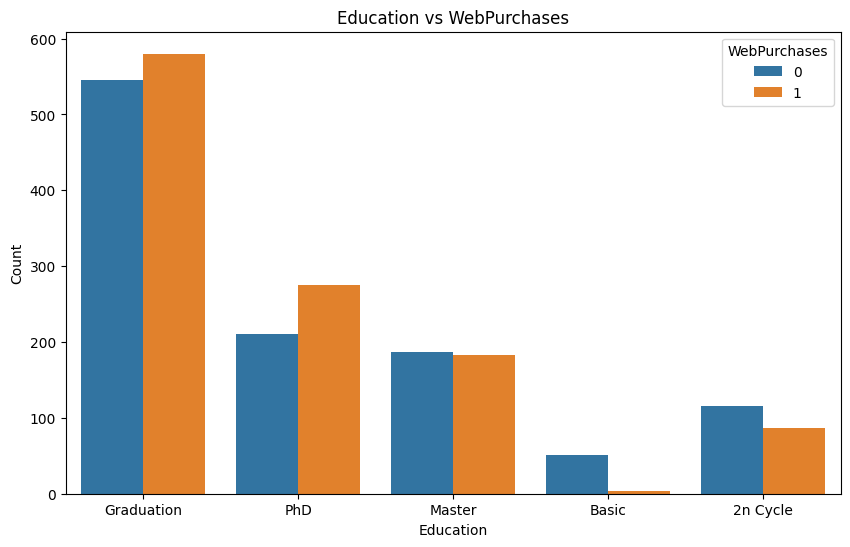

In [24]:
# Relação entre WebPurchases e Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='WebPurchases', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs WebPurchases')
plt.show()

Conforme suspeitávamos, o site atrai mais as pessoas com nível de escolaridade superior. E isso se reflete no comportamento de compra: em média, quem tem ensino superior compra mais, enquanto quem tem apenas ensino básico ou fundamental compra menos.

A seguir, analisaremos se o nível de escolaridade impacta no nível de renda.

<Figure size 1000x600 with 0 Axes>

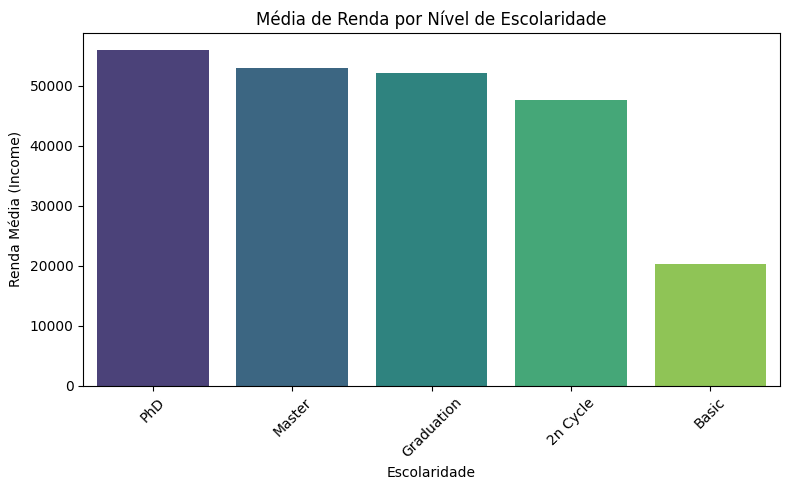

In [25]:
# Relação entre Income e Education
plt.figure(figsize=(10,6))
income_por_educacao = df.groupby('Education')['Income'].mean().reset_index()
income_por_educacao = income_por_educacao.sort_values(by='Income', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=income_por_educacao, x='Education', y='Income', hue='Education', palette='viridis')

plt.title('Média de Renda por Nível de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Renda Média (Income)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De fato, em média, os visitantes com maior nível de escolaridade possuem maior renda.

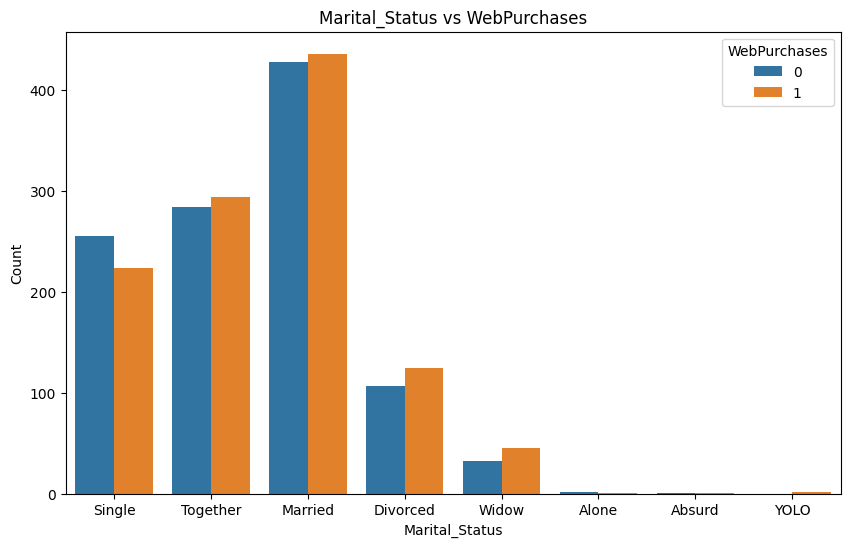

In [26]:
# Relação entre WebPurchases e Marital_Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='WebPurchases', data=df)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Marital_Status vs WebPurchases')
plt.show()

Ao analisar o gráfico percebe-se a presença de algumas respostas inesperadas para o Marital_Status: Absurd e YOLO, que não fazem sentido para o contexto de estado civil, portanto, serão excluídos.

A resposta Alone pode ser interpretada com uma pessoa solteira, portanto, iremos transformar as linhas de Alone para Single, de modo a reduzir o número de respostas possíveis, facilitando futuramente a codificação.

In [27]:
# Exclusão de Valores Inesperadas
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]

In [28]:
# Agrupamento de Valores Semelhantes
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

/tmp/ipython-input-28-564206337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')


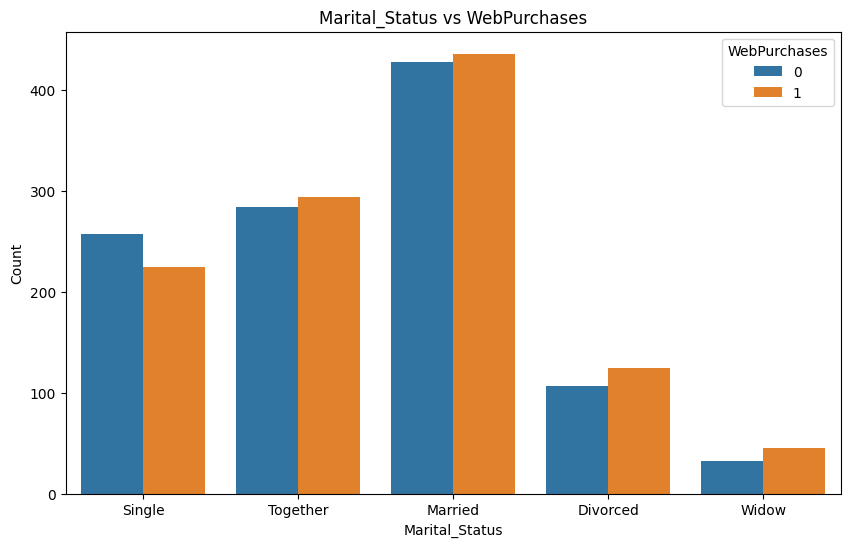

In [29]:
# Relação entre WebPurchases e Marital_Status Após Tratamento
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='WebPurchases', data=df)
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Marital_Status vs WebPurchases')
plt.show()

A maior parte das pessoas casadas realiza compras, enquanto entre os solteiros essa proporção é menor. A diferença existe, mas não é muito grande.

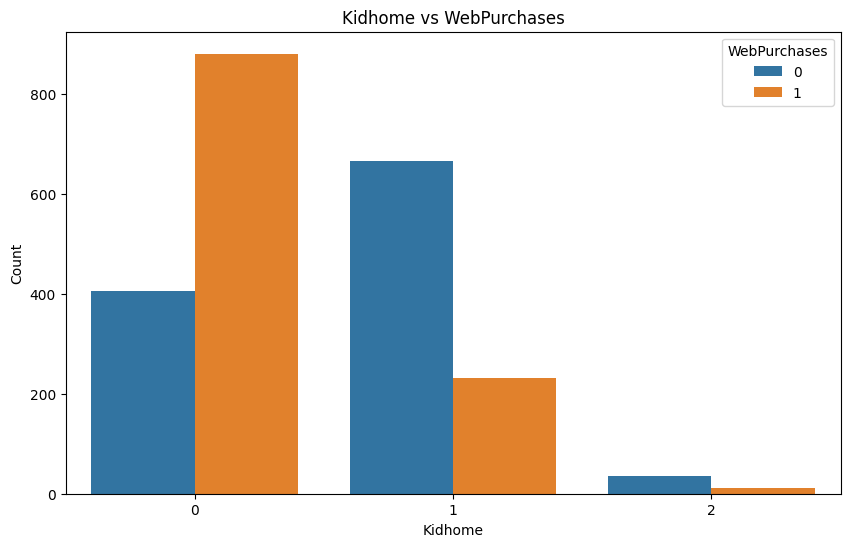

In [30]:
# Relação entre WebPurchases e KidHome
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidhome', hue='WebPurchases', data=df)
plt.xlabel('Kidhome')
plt.ylabel('Count')
plt.title('Kidhome vs WebPurchases')
plt.show()

Neste caso, pode-se observar claramente que os visitantes sem filhos tendem a comprar. Já os visitantes que possuem filhos tendem a não comprar.

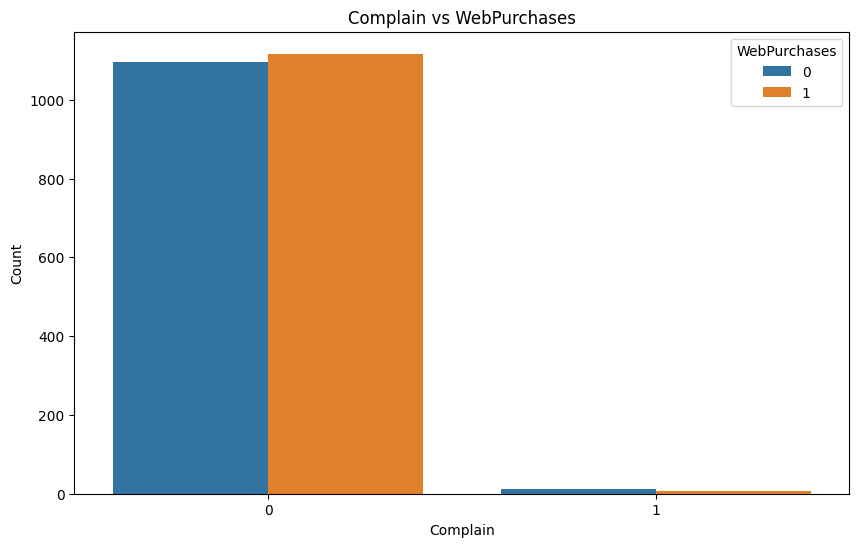

In [31]:
# Relação entre WebPurchases e Complain
plt.figure(figsize=(10, 6))
sns.countplot(x='Complain', hue='WebPurchases', data=df)
plt.xlabel('Complain')
plt.ylabel('Count')
plt.title('Complain vs WebPurchases')
plt.show()

Poucas pessoas reclamaram (0,89%), mas quando ocorre a reclamação a tendência é que o cliente não compre. Já quando o cliente não reclama a tendência é que esse cliente compre.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








Antes de analisar a matriz correlação é necessário codificar as variáveis categóricas. Vamos analisar novamente quais são os tipos de variáveis da base.

In [32]:
df.dtypes

,0
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64


São duas variáveis que teremos que codificar: Education e Marital_Status.

Education: essa é uma variável ordinal, pois existe uma hierarquia clara entre os níveis de escolaridade (do básico ao doutorado). Por isso, faremos um mapeamento manual para preservar essa ordem nas análises.

Marital_Status: essa é uma variável nominal, sem uma ordem natural entre as categorias (casado, solteiro, junto, etc.). Portanto, o ideal é usar one-hot encoding para transformar as categorias em variáveis binárias, evitando atribuir uma ordem inexistente.

In [33]:
# Codificação Education
education_mapping = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(education_mapping)

In [34]:
# Codificação de Marital_Status
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

A variável Marital_Status foi codificada com One-Hot Encoding e drop_first=True para evitar multicolinearidade

In [35]:
df

,Year_Birth,Education,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,3,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,False,True,False,False
1,1954,3,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,False,True,False,False
2,1965,3,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,False,False,True,False
3,1984,3,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,False,False,True,False
4,1981,5,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,3,61223.0,0,46,709,43,182,42,118,247,4,5,0,1,True,False,False,False
2236,1946,5,64014.0,2,56,406,0,30,0,0,8,5,7,0,1,False,False,True,False
2237,1981,3,56981.0,0,91,908,48,217,32,12,24,13,6,0,0,False,False,False,False
2238,1956,4,69245.0,0,8,428,30,214,80,30,61,10,3,0,1,False,False,True,False


Para conseguir rodar a matriz de correlação e o modelo corretamente é necessário transformar as colunas booleanas que estão indicando false e true, 0 e 1, respectivamente.

In [36]:
# Transformação das colunas booleanas
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [37]:
# Visualização do DataFrame
df

,Year_Birth,Education,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,3,58138.0,0,58,635,88,546,172,88,88,4,7,0,1,0,1,0,0
1,1954,3,46344.0,1,38,11,1,6,2,1,6,2,5,0,0,0,1,0,0
2,1965,3,71613.0,0,26,426,49,127,111,21,42,10,4,0,1,0,0,1,0
3,1984,3,26646.0,1,26,11,4,20,10,3,5,4,6,0,0,0,0,1,0
4,1981,5,58293.0,1,94,173,43,118,46,27,15,6,5,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,3,61223.0,0,46,709,43,182,42,118,247,4,5,0,1,1,0,0,0
2236,1946,5,64014.0,2,56,406,0,30,0,0,8,5,7,0,1,0,0,1,0
2237,1981,3,56981.0,0,91,908,48,217,32,12,24,13,6,0,0,0,0,0,0
2238,1956,4,69245.0,0,8,428,30,214,80,30,61,10,3,0,1,0,0,1,0


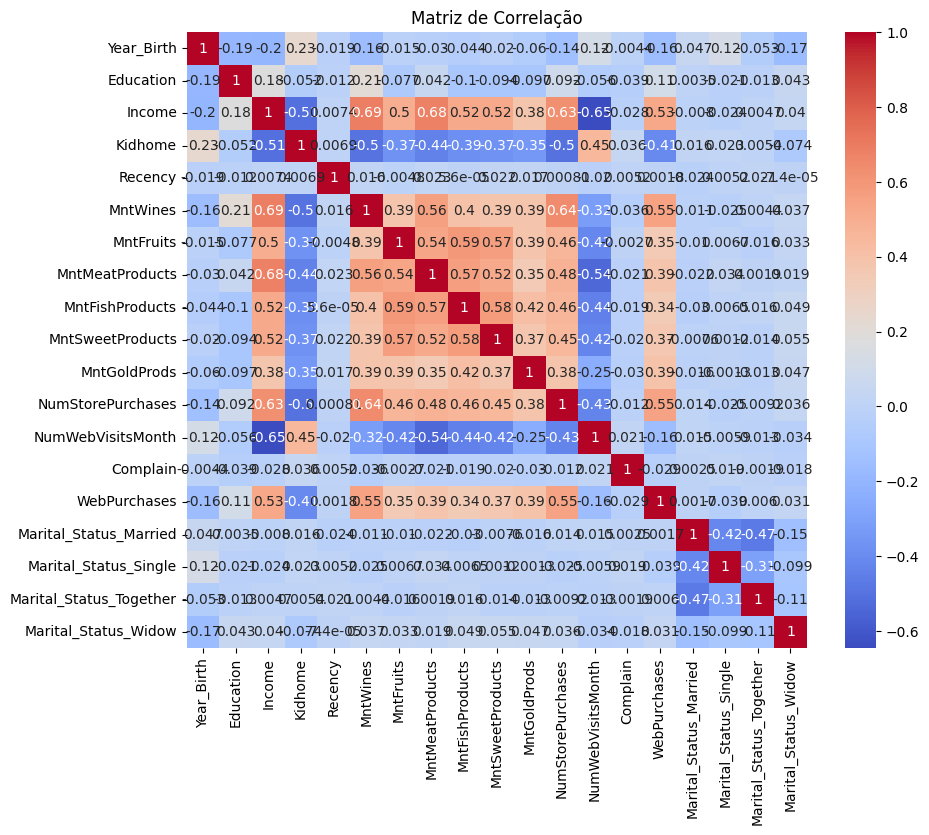

In [38]:
# Matriz de Correlação
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Ao analisar a matriz de correlação observamos que as 4 variáveis mais correlacionadas a WebPurchases são:
NumStorePurchases(0,55), MntWines(0,55), Income(0,53)e Kidhome(-0,4).

Temos outras variáveis com correlação moderada como MntMeatProducts (0,39), MntGoldProds (0,39), MntSweetProducs (0,37), MntFruits (0,35) e MntFishProducts (0,34). Porém, pode-se observar que essas variáveis estão bastante correlacionadas entre si e à renda (Income). Portanto, de modo a evitar multicolinearidade, utilizaremos apenas as 4 variáveis com maior correlação, listadas no primeiro parágrafo.

In [39]:
df = df[['WebPurchases', 'NumStorePurchases', 'MntWines', 'Income', 'Kidhome']]

In [40]:
df.head(5)

,WebPurchases,NumStorePurchases,MntWines,Income,Kidhome
0,1,4,635,58138.0,0
1,0,2,11,46344.0,1
2,1,10,426,71613.0,0
3,0,4,11,26646.0,1
4,1,6,173,58293.0,1


In [41]:
# Separação entre X e y
y = df['WebPurchases']
X = df.drop('WebPurchases', axis=1)

In [45]:
# Separação da Base em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Verificação do Tamanho
print("Tamanho de x_train:", x_train.shape)
print("Tamanho de x_test:", x_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de x_train: (1785, 4)
Tamanho de x_test: (447, 4)
Tamanho de y_train: (1785,)
Tamanho de y_test: (447,)


In [58]:
# Padronização dos Dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
# Análise de Balanceamento dos Dados
print((df['WebPurchases'].value_counts(normalize=True) * 100))

WebPurchases
1    50.358423
0    49.641577
Name: proportion, dtype: float64


Como a base de dados já apresenta as classes de WebPurchases praticamente equilibradas, não é necessário realizar o balanceamento. Fazer isso poderia comprometer a performance do modelo, gerando overfitting ou perda de variabilidade nos dados.

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [61]:
# Regressão Logística
logistic_wp = LogisticRegression()
logistic_wp.fit(x_train_scaled, y_train)
logistic_prev = logistic_wp.predict(x_test_scaled)

In [62]:
# Random Forest
rf_wp = RandomForestClassifier()
rf_wp.fit(x_train_scaled, y_train)
rf_prev = rf_wp.predict(x_test_scaled)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [72]:
# Relatório Regressão Logística
relatorio = classification_report(y_test, logistic_prev)
print("Relatório de Classificação Regressão Logística:")
print(relatorio)

Relatório de Classificação Regressão Logística:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       211
           1       0.85      0.79      0.82       236

    accuracy                           0.81       447
   macro avg       0.81      0.82      0.81       447
weighted avg       0.82      0.81      0.81       447



<Axes: >

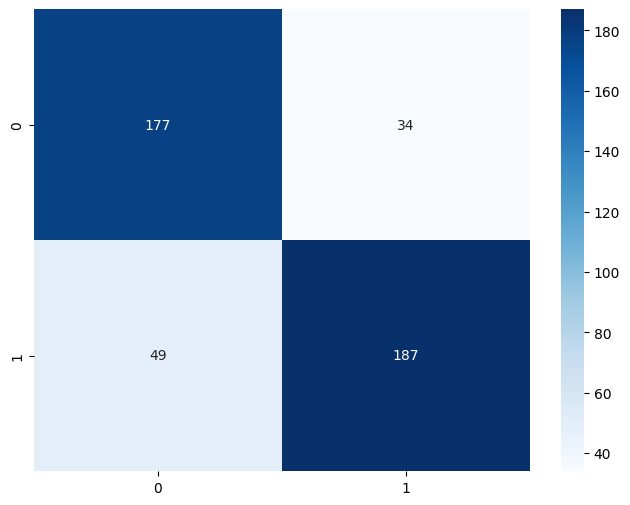

In [69]:
# Matriz de Confusão Regressão Logística
conf_matrix = confusion_matrix(y_test, logistic_prev)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [73]:
# Relatório Random Forest
relatorio = classification_report(y_test, rf_prev)
print("Relatório de Classificação Random Forest:")
print(relatorio)

Relatório de Classificação Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       211
           1       0.87      0.93      0.90       236

    accuracy                           0.89       447
   macro avg       0.89      0.89      0.89       447
weighted avg       0.89      0.89      0.89       447



<Axes: >

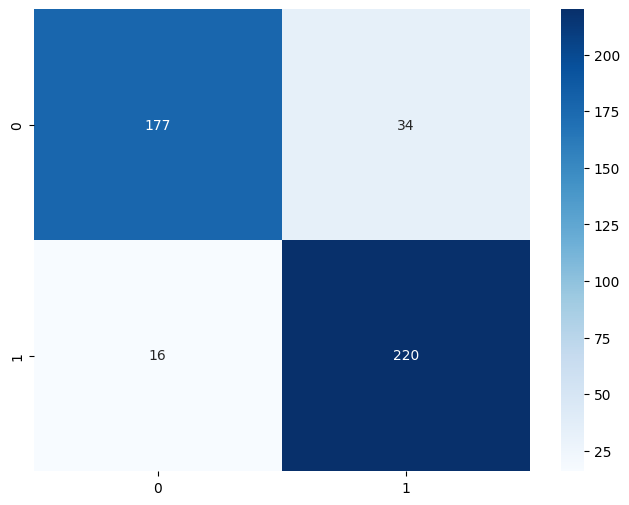

In [71]:
# Matriz de Confusão Random Forest
conf_matrix = confusion_matrix(y_test, rf_prev)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Conclusão
Comparando os dois modelos, o Random Forest teve desempenho melhor em tudo. Acurácia mais alta (0.89 contra 0.81) e f1-score da classe 1 também maior (0.90 contra 0.82). Ou seja, acertou mais e errou menos nos casos positivos. Foi mais equilibrado entre precisão e recall. No geral, classificou melhor.